/bin/bash: line 1: import: command not found


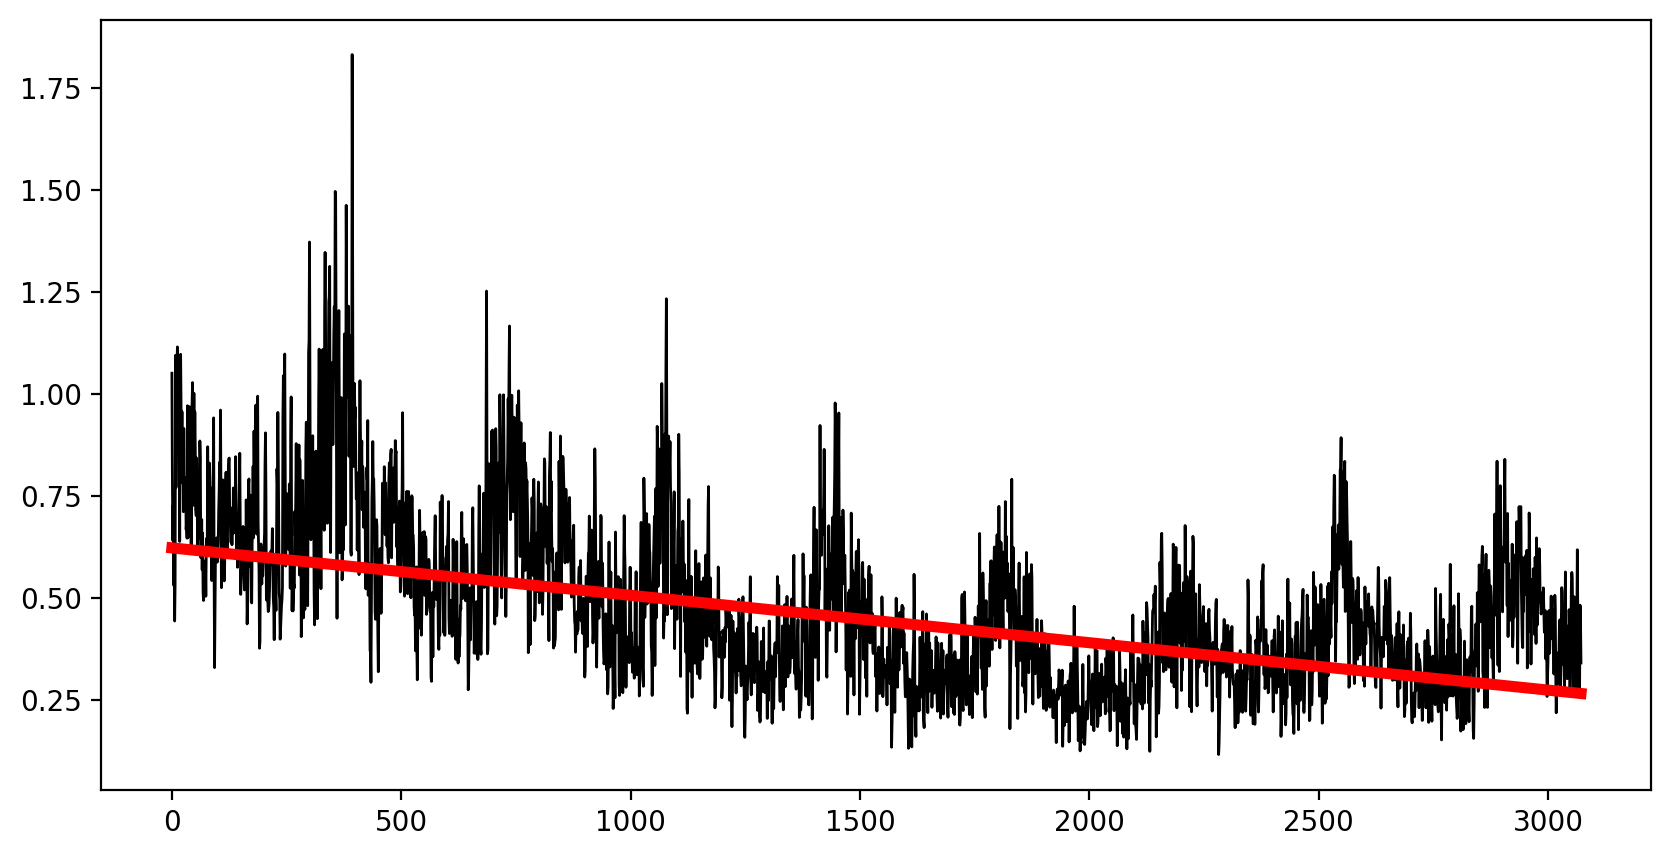

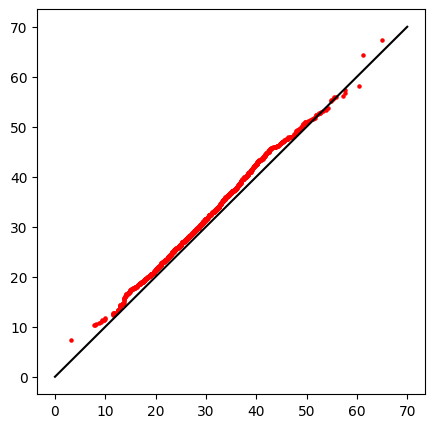

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
!import pingouin as pg
!pip install pymannkendall
import pymannkendall as mk

indice_22 = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/indice_2022.csv")
indice_23 = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/indice_2023.csv")


indice_22.head(25)
len(indice_22)

indice= pd.concat([indice_22,indice_23], axis=0)
indice

indice.columns
ozono = indice[['Noroeste ozono','Noreste ozono','Centro ozono','Suroeste ozono','Sureste ozono',]]
#ozono.info()
ozono.isna().sum()

ozono = ozono.fillna({'Noroeste ozono': ozono['Noroeste ozono'].median(),
              'Noreste ozono': ozono['Noreste ozono'].median(),
              'Centro ozono': ozono['Centro ozono'].median(),
              'Suroeste ozono': ozono['Suroeste ozono'].median(),
              'Sureeste ozono': ozono['Sureste ozono'].median()})

#ozono = indice[['Noroeste ozono','Noreste ozono','Centro ozono','Suroeste ozono','Sureste ozono',]]

#ozono=ozono.resample('MS').mean()
#ozono

#fig, ax = plt.subplots(figsize=(10,5),dpi=200)
#ax.plot(ozono['Noroeste ozono'].resample('M').mean(), label='Noroeste',lw=1,color='violet',marker='o',markersize=6);
#ax.plot(ozono['Noreste ozono'].resample('M').mean(), label='Noreste',lw=1,color='orange',marker='o',markersize=6);
#ax.plot(ozono['Centro ozono'].resample('M').mean(), label='Centro',lw=1,color='cornflowerblue',marker='o',markersize=6);
#ax.plot(ozono['Suroeste ozono'].resample('M').mean(), label='Suroeste',lw=1,color='green',marker='o',markersize=6);
#ax.plot(ozono['Sureste ozono'].resample('M').mean(), label='Sureste',lw=1,color='crimson',marker='o',markersize=6);


#ax.tick_params(labelsize=20)
#ax.tick_params(labelsize=10)
#ax.set_xlabel('Tiempo', fontdict = {'fontsize':12 })
#ax.set_ylabel('O3 ($\mu$g/$m^3$)', fontdict = {'fontsize':12 });
#ax.legend(prop={'size': 9})



df = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv",parse_dates = True, index_col=0)
mk_O3 = mk.original_test(df['CO'], alpha=0.05)
mk_O3

a=mk_O3.slope
b=mk_O3.intercept

def f5(x):
  return x*a+b

x = range(0, 3073)
fig, ax = plt.subplots(figsize=(10,5),dpi=200)
ax.plot(x, df['CO'],lw=1,color='black');
ax.plot(x, [f5(i) for i in x], color='red',lw=4)

len(df['O3'])/2
df['O3'].iloc[0:1536]
sorted(df['O3'].iloc[0:1536])

fig, ax = plt.subplots(figsize=(5,5),dpi=100)
ax.scatter(sorted(df['O3'].iloc[0:1536]), sorted(df['O3'].iloc[1537:3073]),s=5,color='red')
ax.plot([0,70],[0,70],color='black')